# Fire Detection by using CNN

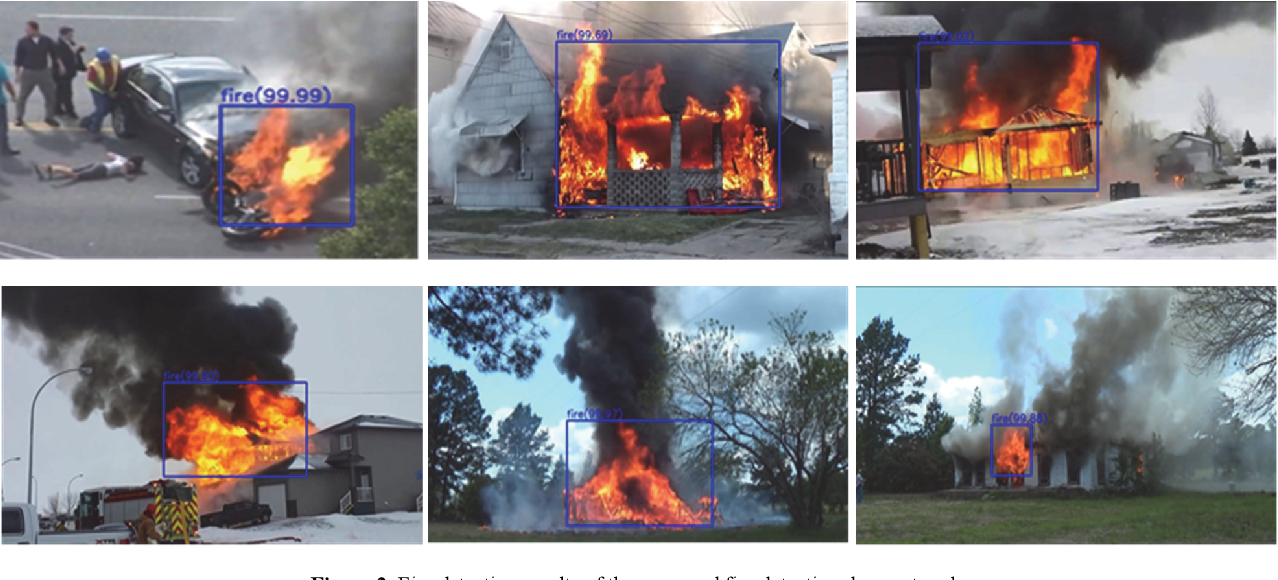

In [1]:
from IPython import display
display.Image('/content/3-Figure2-1.png')

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d atulyakumar98/test-dataset

 98% 129M/132M [00:06<00:00, 23.8MB/s]
100% 132M/132M [00:06<00:00, 20.0MB/s]


In [4]:
!pip install optimal-data-selector

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import optimal_data_selector
import tensorflow
from tensorflow import keras
from keras.layers import Conv2D,Flatten,BatchNormalization,Dropout,GlobalMaxPool2D,MaxPooling2D,Dense
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import os
import zipfile
import math
import shutil
%matplotlib inline

## Unzippling the file

In [6]:
file=zipfile.ZipFile('/content/test-dataset.zip','r')
file.extractall('/content')
file.close()

## Ratio of images

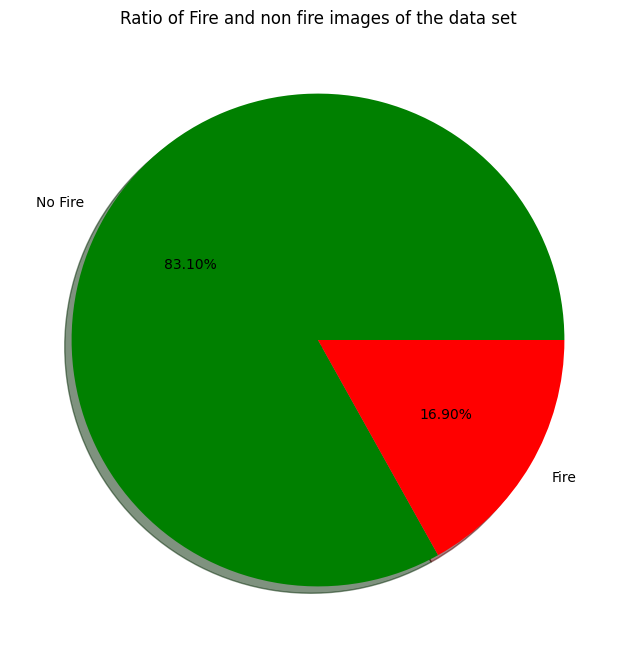

In [7]:
aat=[]
con=[]
for c in range(0,2):
  for i in os.listdir('/content/Fire-Detection/'+str(c)):
    aat.append(c)
  con.append(aat.count(c))
plt.figure(figsize=(12,8))
plt.pie(con,labels=['No Fire','Fire'],colors=['green','red'],shadow=True,autopct='%.2f%%')
plt.title('Ratio of Fire and non fire images of the data set')
plt.show()

## Sample

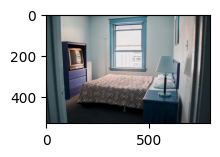

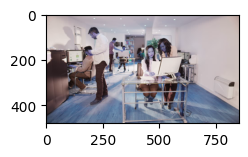

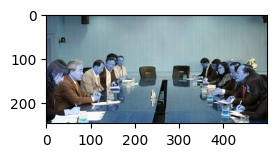

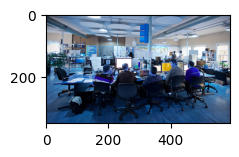

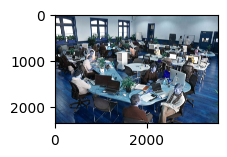

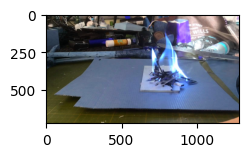

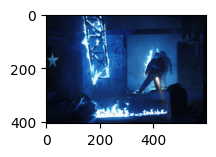

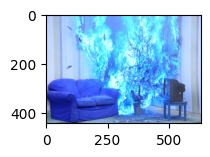

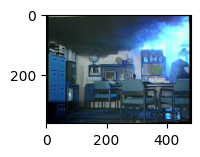

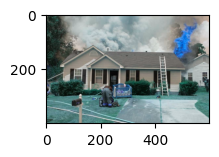

In [8]:

pa=[]
im1=[]
img=[]
path='/content/Fire-Detection/'
for i in range(0,2):
  if i ==0:
    im1.append(os.listdir(path+str(i)))
  else:
    img.append(os.listdir(path+str(i)))
dd=[im1[0][0:5],img[0][0:5]]
for k,t in enumerate(dd,start=0):
  for o in t:
    pa.append(path+str(k)+'/'+o)
for p in pa:
  plt.subplot(3,2,2)
  plt.imshow(cv2.imread(p))
  plt.show()

In [9]:
from optimal_data_selector.image import web_image_downloader
rec=web_image_downloader(file_path='/content/Fire-Detection/1/',
                         url='https://www.freepik.com/search?format=search&page=2&query=fire+real+image&type=photo',
                         img_tag='img[src^="https://img.freepik.com"]',state=5000,
                         next_button_class='pagination__next button floatl pd-y-none-i',page_count=11)
rec

Trying to load all images........
Next state Value would be = 5513
513 Images Found


(513, 'Images saved to the directory')

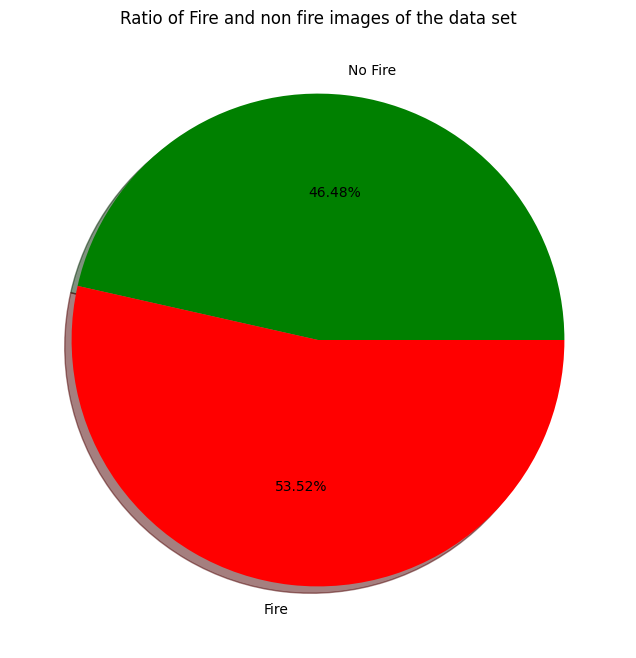

In [10]:
aat=[]
con=[]
for c in range(0,2):
  for i in os.listdir('/content/Fire-Detection/'+str(c)):
    aat.append(c)
  con.append(aat.count(c))
plt.figure(figsize=(12,8))
plt.pie(con,labels=['No Fire','Fire'],colors=['green','red'],shadow=True,autopct='%.2f%%')
plt.title('Ratio of Fire and non fire images of the data set')
plt.show()

## making training and testing folder


In [11]:
c=[]
for f in range(0,2):
  c.append(os.listdir(path+str(f)))
n_len=len(c[0])
f_len=len(c[1])
print(n_len, ',', f_len)
train_0=math.ceil((n_len)*0.8)
train_1=math.ceil((f_len)*0.8)
print('train_0_len = {} and train_1_len is = {}'.format(train_0,train_1))

541 , 623
train_0_len = 433 and train_1_len is = 499


In [12]:
source_directory = '/content/Fire-Detection/0'
destination_directory = '/content/Fire-Detection/train/0'


os.makedirs(destination_directory, exist_ok=True)


files = os.listdir(source_directory)
files.sort()


for i, filename in enumerate(files):
    if i < 433:
        source_file = os.path.join(source_directory, filename)
        destination_file = os.path.join(destination_directory, filename)
        shutil.move(source_file, destination_file)

destination_directory2='/content/Fire-Detection/test/0'
os.makedirs(destination_directory2,exist_ok=True)
files1=os.listdir(source_directory)
files1.sort()
for f,i2 in enumerate(files):
  if f >=433:
    source_file2=os.path.join(source_directory,i2)
    destination_file2 = os.path.join(destination_directory2,i2)
    shutil.move(source_file2,destination_file2)

In [13]:
source_directory3='/content/Fire-Detection/1'
destination_directory3='/content/Fire-Detection/train/1'


os.makedirs(destination_directory3,exist_ok=True)

files4=os.listdir(source_directory3)
files4.sort()
for f1,j in enumerate(files4):
  if f1 < 499:
    source_file3=os.path.join(source_directory3,j)
    destination_file3=os.path.join(destination_directory3,j)
    shutil.move(source_file3,destination_file3)
files5=os.listdir(source_directory3)
files5.sort()
for f2,j1 in enumerate(files5):
  if f2 >= 499:
    source_file4=os.path.join(source_directory3,j1)
    destination_file4=os.path.join(destination_directory4,j1)
    shutil.move(source_file4,destination_file4)

In [14]:
destination_directory4='/content/Fire-Detection/test/1'
os.makedirs(destination_directory4,exist_ok=True)
files5=os.listdir(source_directory3)
files5.sort()
for f2,j1 in enumerate(files5):
  source_file4=os.path.join(source_directory3,j1)
  destination_file4=os.path.join(destination_directory4,j1)
  shutil.move(source_file4,destination_file4)

## Training and Validation data

In [15]:
train_ds=keras.utils.image_dataset_from_directory(directory='/content/Fire-Detection/train',image_size=(250,250))
test_ds=keras.utils.image_dataset_from_directory(directory='/content/Fire-Detection/test',image_size=(250,250))

Found 932 files belonging to 2 classes.
Found 232 files belonging to 2 classes.


In [16]:
def processing(image,label):
  image1=tensorflow.cast(image/255,tensorflow.float64)
  return image1,label
train_data=train_ds.map(processing)
test_data=test_ds.map(processing)

## Model building

In [17]:
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping

In [18]:
pwd

'/content'

In [19]:
path='/content/model_checkpoint04-{epoch:02d}-{val_accuracy:.3f}.h5'
checkpoint=ModelCheckpoint(filepath=path,monitor='val_accuracy',verbose=1,mode='max',save_best_only=True)
rdl=ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=10,min_delta=0.0001,verbose=1)
ers=EarlyStopping(monitor='val_loss',min_delta=0.000001,patience=50,verbose=1)
callback=[checkpoint,rdl,ers]

In [20]:
model=Sequential()
model.add(Conv2D(filters=32,padding='valid',activation='relu',input_shape=(250,250,3),kernel_size=(3,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(256,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Conv2D(256,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Conv2D(256,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(250,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(150,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(100,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 246, 246, 32)      9248      
                                                                 
 batch_normalization (Batch  (None, 246, 246, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 123, 123, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 121, 121, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 119, 119, 64)      3

In [22]:
model.compile(optimizer='adam',loss='BinaryCrossentropy',metrics=['accuracy'])
H=model.fit(train_data,validation_data=test_data,epochs=200,callbacks=callback,batch_size=10,verbose=1)

Epoch 1/200
30/30 [==============================] - ETA: 0s - loss: 1.4547 - accuracy: 0.7350
Epoch 1: val_accuracy improved from -inf to 0.63793, saving model to /content/model_checkpoint04-01-0.638.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


30/30 [==============================] - 31s 339ms/step - loss: 1.4547 - accuracy: 0.7350 - val_loss: 0.8755 - val_accuracy: 0.6379 - lr: 0.0010
Epoch 2/200
29/30 [============================>.] - ETA: 0s - loss: 1.2089 - accuracy: 0.7748
Epoch 2: val_accuracy did not improve from 0.63793
30/30 [==============================] - 10s 287ms/step - loss: 1.2088 - accuracy: 0.7736 - val_loss: 1.2900 - val_accuracy: 0.5431 - lr: 0.0010
Epoch 3/200
29/30 [============================>.] - ETA: 0s - loss: 0.7167 - accuracy: 0.8233
Epoch 3: val_accuracy did not improve from 0.63793
30/30 [==============================] - 9s 246ms/step - loss: 0.7141 - accuracy: 0.8240 - val_loss: 0.7247 - val_accuracy: 0.4224 - lr: 0.0010
Epoch 4/200
29/30 [============================>.] - ETA: 0s - loss: 0.5034 - accuracy: 0.8373
Epoch 4: val_accuracy did not improve from 0.63793
30/30 [==============================] - 11s 332ms/step - loss: 0.5016 - accuracy: 0.8380 - val_loss: 0.9148 - val_accuracy: 0.5

In [23]:
from keras.models import load_model
f_model=load_model('/content/model_checkpoint04-54-0.922.h5')

In [24]:
f_model.save('fire detection.h5')

In [25]:
f_model.evaluate(test_data)

8/8 [==============================] - 2s 64ms/step - loss: 0.3008 - accuracy: 0.9224


[0.30079859495162964, 0.9224137663841248]

## Training and testing accuracy

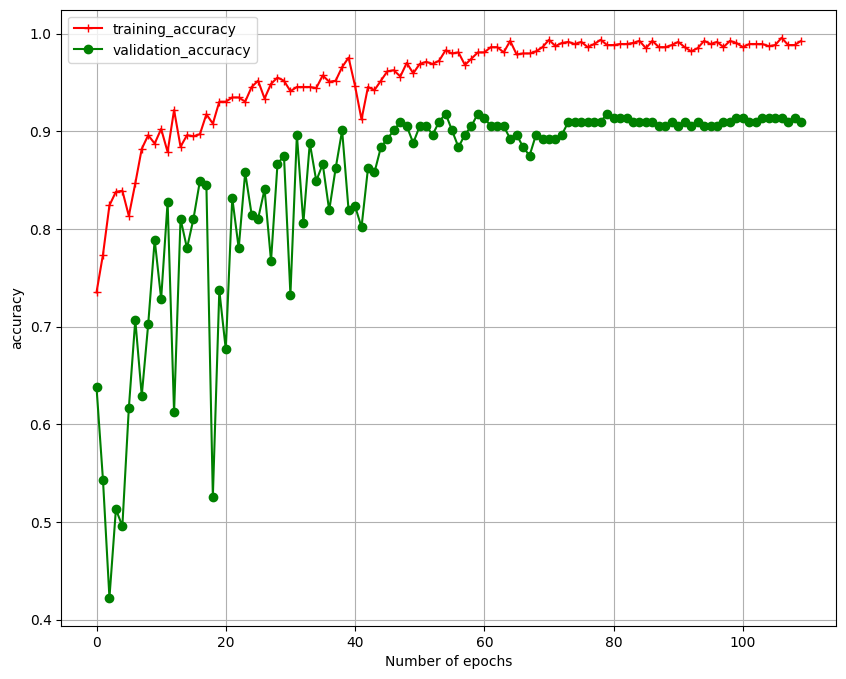

In [26]:
plt.figure(figsize=(10,8))
plt.plot(H.epoch,H.history['accuracy'],color='red',marker='+',label='training_accuracy')
plt.plot(H.epoch,H.history['val_accuracy'],color='green',marker='o',label='validation_accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()

## Training and testing loss

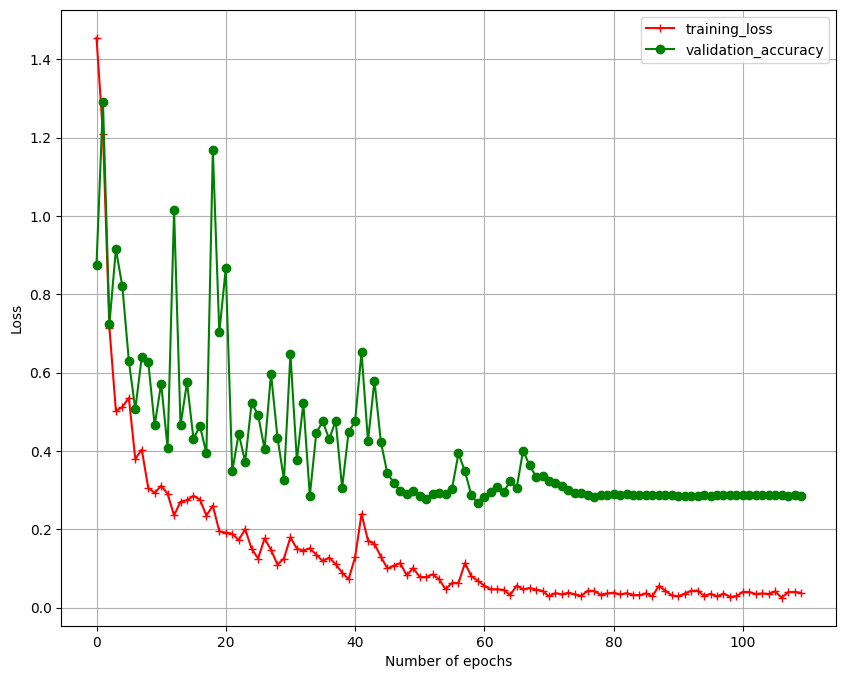

In [27]:
plt.figure(figsize=(10,8))
plt.plot(H.epoch,H.history['loss'],color='red',marker='+',label='training_loss')
plt.plot(H.epoch,H.history['val_loss'],color='green',marker='o',label='validation_accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Transfer learning

In [28]:
from keras.applications.vgg16 import VGG16
vgg16=VGG16(weights='imagenet',include_top=False,input_shape=(250,250,3))

58889256/58889256 [==============================] - 4s 0us/step


In [29]:
for l in vgg16.layers:
  l.trainable = False

In [30]:
vgg_model=Sequential()
vgg_model.add(vgg16)
vgg_model.add(BatchNormalization())
vgg_model.add(MaxPooling2D(pool_size=(2,2),padding='valid',strides=2))
vgg_model.add(Flatten())

vgg_model.add(Dense(250,activation='relu'))
vgg_model.add(Dropout(0.2))

vgg_model.add(Dense(150,activation='relu'))
vgg_model.add(Dropout(0.2))

vgg_model.add(Dense(100,activation='relu'))
vgg_model.add(Dropout(0.2))

vgg_model.add(Dense(1,activation='sigmoid'))

In [31]:
vgg_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 batch_normalization_4 (Bat  (None, 7, 7, 512)         2048      
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 3, 3, 512)         0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_4 (Dense)             (None, 250)               1152250   
                                                                 
 dropout_3 (Dropout)         (None, 250)              

In [32]:
path1='/content/vgg16_checkpoint04-{epoch:02d}-{val_accuracy:.3f}.h5'
checkpoint1=ModelCheckpoint(filepath=path1,monitor='val_accuracy',verbose=1,mode='max',save_best_only=True)
rdl1=ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=10,min_delta=0.0001,verbose=1)
ers1=EarlyStopping(monitor='val_loss',min_delta=0.000001,patience=50,verbose=1)
callback1=[checkpoint1,rdl1,ers1]

In [33]:
vgg_model.compile(loss='BinaryCrossentropy',optimizer='adam',metrics=['accuracy'])
H1=vgg_model.fit(train_data,validation_data=test_data,epochs=200,verbose=1,callbacks=callback1)

Epoch 1/200
30/30 [==============================] - ETA: 0s - loss: 0.3368 - accuracy: 0.8745
Epoch 1: val_accuracy improved from -inf to 0.81897, saving model to /content/vgg16_checkpoint04-01-0.819.h5
30/30 [==============================] - 20s 416ms/step - loss: 0.3368 - accuracy: 0.8745 - val_loss: 0.4297 - val_accuracy: 0.8190 - lr: 0.0010
Epoch 2/200
29/30 [============================>.] - ETA: 0s - loss: 0.1407 - accuracy: 0.9547
Epoch 2: val_accuracy improved from 0.81897 to 0.87069, saving model to /content/vgg16_checkpoint04-02-0.871.h5
30/30 [==============================] - 10s 306ms/step - loss: 0.1403 - accuracy: 0.9549 - val_loss: 0.3146 - val_accuracy: 0.8707 - lr: 0.0010
Epoch 3/200
29/30 [============================>.] - ETA: 0s - loss: 0.0839 - accuracy: 0.9752
Epoch 3: val_accuracy did not improve from 0.87069
30/30 [==============================] - 11s 314ms/step - loss: 0.0837 - accuracy: 0.9753 - val_loss: 0.7196 - val_accuracy: 0.7241 - lr: 0.0010
Epoch 4/

In [34]:
vgg16_model=load_model('/content/vgg16_checkpoint04-12-0.922.h5')
vgg16_model.save('vgg_model(fire_detectio).h5')

In [35]:
vgg_pre=vgg16_model.evaluate(test_data)

8/8 [==============================] - 3s 153ms/step - loss: 0.4778 - accuracy: 0.9224


## VGG 16 model Accuracy and Loss

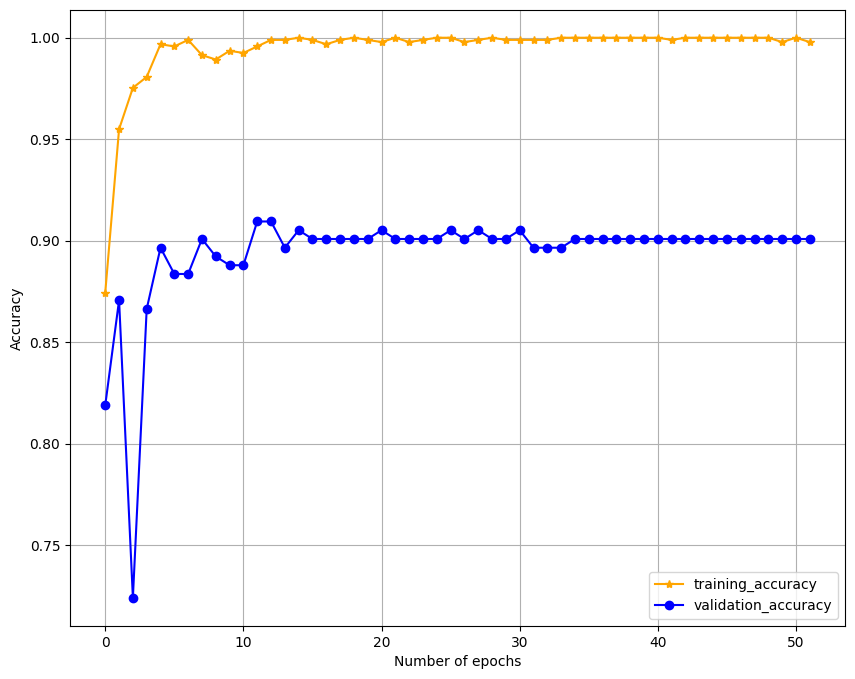

In [36]:
plt.figure(figsize=(10,8))
plt.plot(H1.epoch,H1.history['accuracy'],color='orange',label='training_accuracy',marker='*')
plt.plot(H1.epoch,H1.history['val_accuracy'],color='blue',label='validation_accuracy',marker='o')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

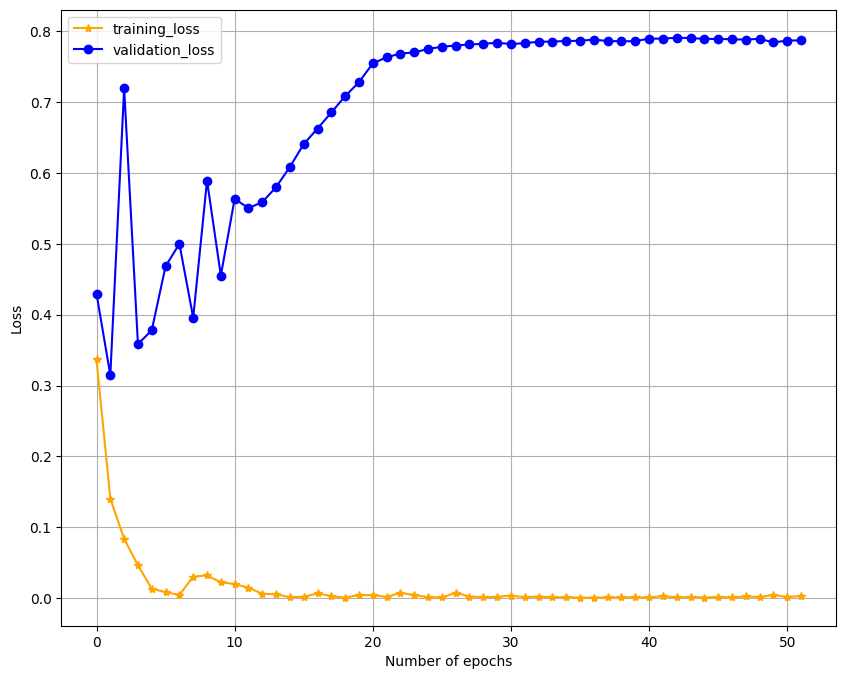

In [37]:
plt.figure(figsize=(10,8))
plt.plot(H1.epoch,H1.history['loss'],color='orange',label='training_loss',marker='*')
plt.plot(H1.epoch,H1.history['val_loss'],color='blue',label='validation_loss',marker='o')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [38]:
'''                                                       Thank You                                                          '''

'                                                       Thank You                                                          '